In [1]:
def DTWDistance(s1, s2,w):
    DTW={}

    w = max(w, abs(len(s1)-len(s2)))

    for i in range(-1,len(s1)):
        for j in range(-1,len(s2)):
            DTW[(i, j)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(max(0, i-w), min(len(s2), i+w)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])

    return sqrt(DTW[len(s1)-1, len(s2)-1])

In [4]:
import pandas as pd
import numpy as np
import scipy
import os
import os.path
from matplotlib import cm
from IPython.display import display, HTML

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import calendar

df = pd.read_csv("Data/br_29.csv")

In [5]:
import scipy.spatial.distance as dist

In [9]:
A = df["3"]
B = df["4"]

In [10]:
df

print('\nEuclidean distance is', dist.euclidean(A, B))
print('Manhattan distance is', dist.cityblock(A, B))
print('Chebyshev distance is', dist.chebyshev(A, B))
print('Canberra distance is', dist.canberra(A, B))
print('Cosine distance is', dist.cosine(A, B))


Euclidean distance is 0.9911069301522843
Manhattan distance is 4.2530509301
Chebyshev distance is 0.344440738151
Canberra distance is 0.14321547282
Cosine distance is 4.70643398666e-05


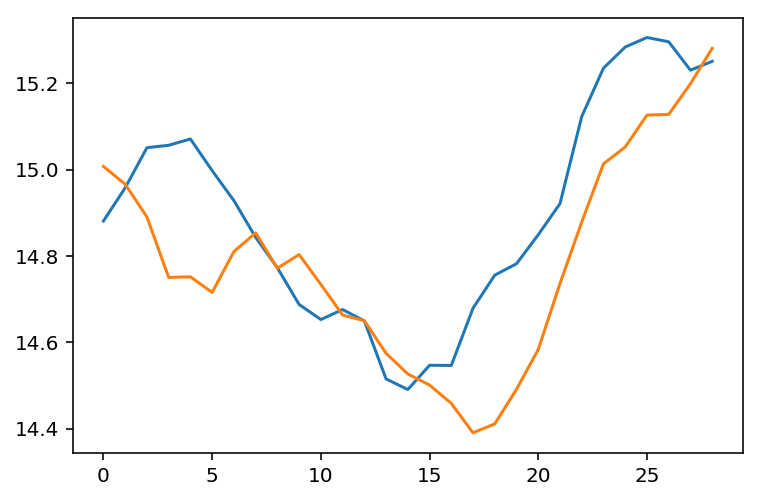

In [12]:
plt.plot(A)
plt.plot(B)

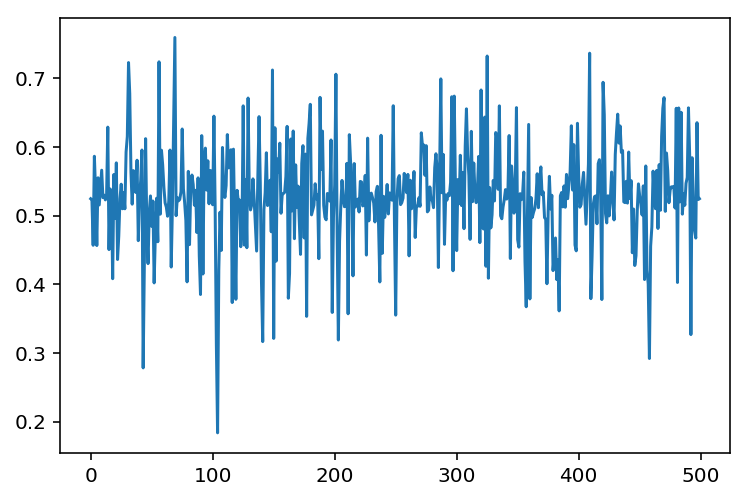

In [22]:
n = 10000 
ts_len = 500

phases = np.array(np.random.randint(0, 50, [n, 2]))
pure = np.sin([np.linspace(-np.pi * x[0], -np.pi * x[1], ts_len) for x in phases])
noise = np.array([np.random.normal(0, 1, ts_len) for x in range(n)])

signals = pure * noise
           
# Normalize everything between 0 and 1
signals += np.abs(np.min(signals))
signals /= np.max(signals)

plt.plot(signals[1])

In [23]:
signals

array([[ 0.52462025,  0.52292742,  0.56573007, ...,  0.52103536,
         0.53740219,  0.52462025],
       [ 0.52462025,  0.52330459,  0.45685725, ...,  0.63531441,
         0.52344319,  0.52462025],
       [ 0.52462025,  0.52626777,  0.49256432, ...,  0.51703049,
         0.52696307,  0.52462025],
       ..., 
       [ 0.52462025,  0.52172083,  0.52566252, ...,  0.52520848,
         0.52740647,  0.52462025],
       [ 0.52462025,  0.51478986,  0.48764947, ...,  0.50497634,
         0.53904797,  0.52462025],
       [ 0.52462025,  0.55051633,  0.54858463, ...,  0.50771495,
         0.53492214,  0.52462025]])

In [30]:
centroids = k_means(signals, 100, 100)
centroids[1]

early finish!


array([ 0.52462025,  0.52752174,  0.50486394,  0.51601848,  0.46636832,
        0.51010945,  0.49719827,  0.53912355,  0.56684607,  0.52485942,
        0.60261341,  0.45784322,  0.48903234,  0.4733093 ,  0.32522102,
        0.35823945,  0.42652486,  0.47330301,  0.60201078,  0.53063055,
        0.42785161,  0.5435548 ,  0.50341649,  0.66633758,  0.44902209,
        0.59172636,  0.38722148,  0.48683316,  0.42938429,  0.41990645,
        0.53698976,  0.5738269 ,  0.57430762,  0.54594802,  0.52461376,
        0.54897416,  0.53058348,  0.54268978,  0.524327  ,  0.52409571,
        0.52363207,  0.50450113,  0.57237415,  0.54838413,  0.49893682,
        0.57501586,  0.5693078 ,  0.57482779,  0.52504463,  0.48064639,
        0.68733714,  0.59187865,  0.61380351,  0.62816128,  0.55779947,
        0.35235406,  0.49996766,  0.42453016,  0.41860523,  0.49988699,
        0.53022907,  0.60363029,  0.71670169,  0.6921575 ,  0.74897339,
        0.67601029,  0.45696028,  0.55696416,  0.37592005,  0.48

In [28]:
len(signals)

10000

In [27]:
def euclid_dist(t1, t2):
    return np.sqrt(((t1-t2)**2).sum(axis = 1))

def calc_centroids(data, centroids):
    dist = np.zeros([data.shape[0], centroids.shape[0]])

    for idx, centroid in enumerate(centroids): 
        dist[:, idx] = euclid_dist(centroid, data)

    return np.array(dist)

def closest_centroids(data, centroids): 
    dist = calc_centroids(data, centroids) 
    return np.argmin(dist, axis = 1)

def move_centroids(data, closest, centroids):
    k = centroids.shape[0]
    new_centroids = np.array([data[closest == c].mean(axis = 0) for c in np.unique(closest)])

    if k - new_centroids.shape[0] > 0:
       print("adding {} centroid(s)".format(k - new_centroids.shape[0]))
       additional_centroids = data[np.random.randint(0, data.shape[0], k - new_centroids.shape[0])] 
       new_centroids = np.append(new_centroids, additional_centroids, axis = 0)

    return new_centroids

def k_means(data, num_clust, num_iter):
    centroids = signals[np.random.randint(0, signals.shape[0], num_clust)]
    last_centroids = centroids

    for n in range(num_iter):
        closest = closest_centroids(data, centroids)
        centroids = move_centroids(data, closest, centroids)
        if not np.any(last_centroids != centroids):
           print("early finish!")
           break
        last_centroids = centroids 
    
    return centroids